# Imports

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loading owid-covid-data

In [63]:
df_cases = pd.read_csv('../data/owid-covid-data.csv', low_memory=False)
df_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [142]:
col=(df_cases[df_cases['iso_code']=='DEU'].mean()).index[df_cases[df_cases['iso_code']=='DEU'].std()<1e-9].values
df_country = df_cases.groupby('iso_code').mean()[col]
df_country.head()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,
ABW,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,11.62,NaN,NaN,NaN,76.29,NaN
AFG,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.50,64.83,0.498
AGO,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94,NaN,NaN,NaN,61.15,0.581
AIA,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
ALB,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,0.785


In [64]:
print(df_cases.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


In [65]:
def extract_cases_deaths_by_iso(df, iso):
    """extract list of new cases and new deaths for given iso code"""
    # extract cases and deaths
    df_iso = df.loc[df['iso_code']==iso,['new_cases', 'new_deaths', 'total_cases', 'total_deaths']]
    # set index to datetime
    df_iso = df_iso.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']==iso,'date']).values))
    return df_iso

286

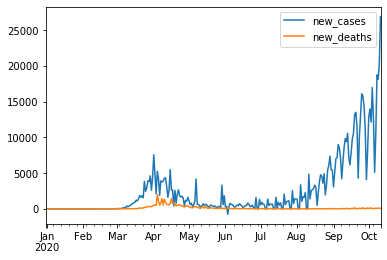

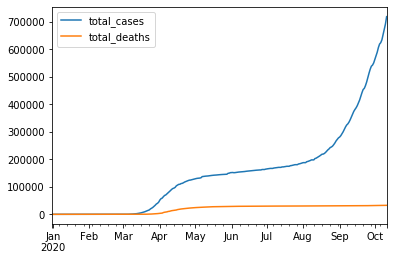

In [66]:
df_cases_test = extract_cases_deaths_by_iso(df_cases, iso='FRA')
df_cases_test[['new_cases','new_deaths']].plot();
df_cases_test[['total_cases','total_deaths']].plot();
df_cases_test.shape[0]

In [67]:
def plot_cases_countries(df, category='new_cases_smoothed_per_million', countries=['DEU','FRA','GBR','USA','ESP']):
    df_new_cases = pd.concat([pd.DataFrame(data=df.loc[df['iso_code']==iso,'new_cases_smoothed_per_million'].values, columns=[iso])
               for iso in df['iso_code'].unique()], axis=1)
    df_new_cases = df_new_cases.set_index(pd.DatetimeIndex(pd.to_datetime(df.loc[df['iso_code']=='DEU','date']).values))
    df_new_cases[['DEU','FRA','GBR','USA','ESP']].plot(title=category);

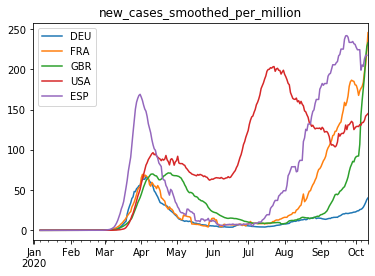

In [68]:
plot_cases_countries(df_cases, category='new_cases_smoothed_per_million', countries=['DEU','FRA','GBR','USA','ESP'])

In [69]:
df_cases['iso_code'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

## Loading WHO measures data

In [70]:
df_measures = pd.read_excel('../data/WHO_PHSM_Cleaned_V1_20_09_23.xlsx')
df_measures.head()

,who_id,dataset,prop_id,who_region,country_territory_area,iso,iso_3166_1_numeric,admin_level,area_covered,who_code,...,enforcement,non_compliance_penalty,link,link_live,link_eng,source,source_type,alt_link,alt_link_live,alt_link_eng
0,ACAPS_4266,ACAPS,4266,EMRO,Afghanistan,AFG,4,national,NaN,2.1,...,Recommended,Not applicable,https://www.facebook.com/af.moph/posts/1037390...,Yes,No,Afghanistan MoPH,Government,Not Known,NaN,NaN
1,OxCGRT_12010,OxCGRT,OXCGRT000304,EMRO,Afghanistan,AFG,4,national,NaN,1.5,...,Not applicable,Not known,https://web.archive.org/web/20200621203814/htt...,unknown,unknown,NaN,NaN,NaN,NaN,NaN
2,JH_HIT_4942_masks,JH_HIT,4942_masks,EMRO,Afghanistan,AFG,4,national,NaN,1.4,...,Required,Not applicable,https://www.humanitarianresponse.info/sites/ww...,unknown,unknown,NaN,NaN,NaN,NaN,NaN
3,CDC-ITF-AF-00028,CDC_ITF,CDC-ITF-AF-00028,EMRO,Afghanistan,AFG,4,national,NaN,5.9,...,Monitored,Not known,https://www.pajhwok.com/en/2020/03/16/2-key-ro...,unknown,unknown,NaN,NaN,NaN,NaN,NaN
4,OxCGRT_10765,OxCGRT,OXCGRT000316,EMRO,Afghanistan,AFG,4,national,NaN,5.9,...,Monitored,Not applicable,https://web.archive.org/web/20200605013211/htt...,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [105]:
select = np.logical_and(df_measures['admin_level']=='national', df_measures['iso']=='DEU')
df_measures[select]['who_code']

2716       1.4
2717       5.5
2718       5.1
2719       5.3
2720       5.3
         ...  
21774    3.2.1
30685      8.2
31026    4.2.1
31027    4.2.1
31028    4.1.1
Name: who_code, Length: 218, dtype: object

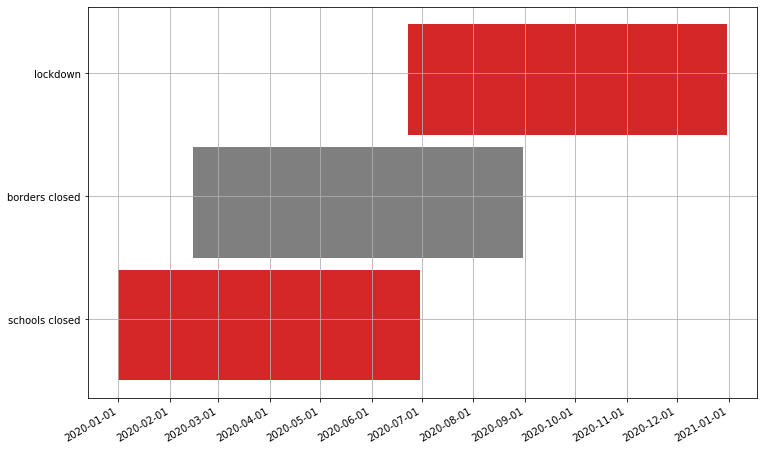

In [107]:
meas_data_plt = pd.DataFrame({'name':['schools closed', 'borders closed', 'lockdown'],
                               'start.date':['2020-01-01', '2020-02-15', '2020-06-23'],
                               'end.date':['2020-06-30', '2020-08-31', '2020-12-31'],
                               'is.critical':[True, False, True]})

def plot_bars(meas_data_plt):
    # Formatters for x-axis labels
    months = mdates.MonthLocator()  # every month
    date_fmt = mdates.DateFormatter('%Y-%m-%d')
    # Create duration column for bars sizes
    meas_data_plt['start.date'] = pd.to_datetime(meas_data_plt['start.date'])
    meas_data_plt['end.date'] = pd.to_datetime(meas_data_plt['end.date'])
    meas_data_plt['duration'] = meas_data_plt['end.date'] - meas_data_plt['start.date']
    # Preperation to have locations of the bars on the y-axis
    meass = {meas : (i+1)*10 for i, meas in enumerate( dict.fromkeys(meas_data_plt['name']) )}
    # Override pandas mandatory conversion to Timestamp
    start_times = [np.datetime64(t, 'D') for t in meas_data_plt['start.date'] ]

    fig, ax_gnt = plt.subplots(figsize = (12, 8))
    # Add bars for each duration
    for i, t in enumerate(meas_data_plt['name']):
        ax_gnt.broken_barh([(start_times[i], meas_data_plt['duration'][i])], (meass[t], 9),
                            facecolors = ('tab:red') if meas_data_plt['is.critical'][i] else ('tab:grey')) 
    ax_gnt.grid(True)
    ax_gnt.set_yticks([i + 5 for i in meass.values()]) 
    ax_gnt.set_yticklabels(dict.fromkeys(meas_data_plt['name']).keys()) 
    # Format the x-axis
    ax_gnt.xaxis_date()
    ax_gnt.xaxis.set_major_locator(months)
    ax_gnt.xaxis.set_major_formatter(date_fmt)
    fig.autofmt_xdate()

plot_bars(meas_data_plt)